### 1. 已知 A=0.6、B=1.2、C=100，試以 D 值可能出現的 1024 種可能性為 X 軸，Energy(A,B,C,D) 為 Y 軸，繪製折線圖

In [11]:
import numpy as np
def F2(T, D):
    return 0.6*(T**1.2) + 100*np.cos(D*T) + np.random.normal(0, 1, T.shape)
T = np.random.random((1000, 1))*100
b2 = F2(T, 0.4)

In [12]:
def gene2coef(D):
    D_range = (D-511)/100
    return D_range

In [13]:

# 產生隨機整數 low, high(不包含), size
fit = [] # sum of |predict - actual|
d_list = []
for i in range(1024):
    D = gene2coef(i)
    d_list.append(D)
    fit.append(np.sum(abs(F2(T, D) - b2)))

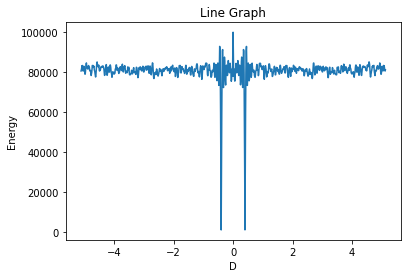

In [17]:
import matplotlib.pyplot as plt
plt.plot(d_list, fit)
plt.title('Line Graph')
plt.xlabel("D")
plt.ylabel("Energy")
plt.show()


### 2. 已知 B=1.2、D=0.4，試以 A、C 可能出現的值為 X、Y 軸，Energy(A,B,C,D)為 Z 軸，繪製 3D surface

In [15]:
def F2_2(T, A, C):
    return A*(T**1.2) + C*np.cos(0.4*T) + np.random.normal(0, 1, T.shape)

def gene2coef_2(A, C):
    A = (A-511)/100 # max -5.11~5.12
    C = (C-511)
    return A, C

In [18]:
fit2 = []
T = np.random.random((1000, 1))*100

a_list = []
c_list = []
for i in range(1024):
    fit2.append([])
    for j in range(1024):
        A, C = gene2coef_2(i, j)
        a_list.append(A)
        c_list.append(C)
        fit2[i].append(np.sum(abs(F2_2(T, A, C) - b2)))

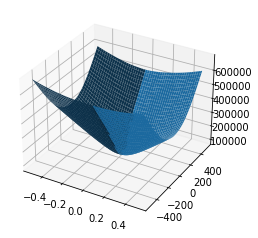

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = (np.arange(1024) - 511)/1000
y = np.arange(1024) - 511

fit2 = np.array(fit2)
xx, yy = np.meshgrid(x, y)
axl = plt.axes(projection = '3d')
axl.plot_surface(xx, yy, fit2)
plt.show()